In [4]:
# Importing the required libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline


In [6]:
# Reading the CSV File

df = pd.read_csv('http://bit.ly/w-data')

In [7]:
# .head() displays the first few data entries
# .tail() would display the last few entries

df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [165]:
# Checking the length of the dataset

len(df)

25

## Exploratory Data Analysis

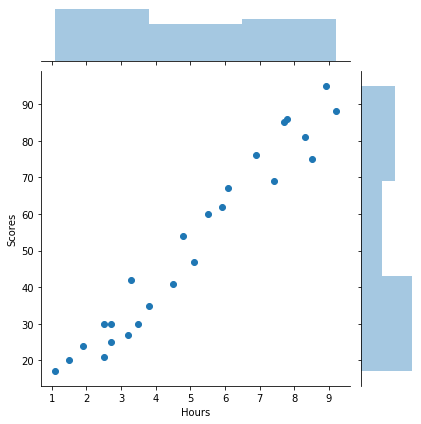

In [120]:
# Creating a Joint Plot using Seaborn

x = df.get('Hours')
y = df.get('Scores')

sns.jointplot(x,y)

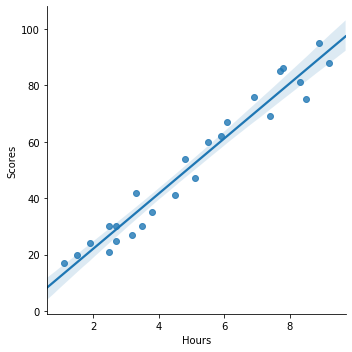

In [8]:
# Creating LM Plot using seaborn 

sns.lmplot(x='Hours', y='Scores', data=df)

## Getting Data for Regression Model


In [7]:
df.columns

Index(['Hours', 'Scores'], dtype='object')

In [12]:
X = df.iloc[:,:-1].values      # Selecting all values excluding the last column
Y = df.iloc[:,1].values        # Selecting only the last column

## Splitting Data

In [9]:
# importing function to conduct the splitting of data

from sklearn.model_selection import train_test_split

In [13]:
# This funtion splits the data into a Tran Dataset and a Test Dataset 
# test_size defines the size of the Test Dataset; the rest goes into the Train Dataset

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.33, random_state=33)


## Training model

In [14]:
# Importig function to create a Linear Regression model

from sklearn.linear_model import LinearRegression

In [15]:
# lr stands for 'linear regressor'

lr = LinearRegression()

In [16]:
# The .fit() function creates the model using the train and test datasets created earlier

lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Testing model


In [27]:
# Testing the model on Test Dataset 

predictions = lr.predict(X_test)
predictions

array([77.2472219 , 87.41353166, 22.7188332 , 19.02199329, 37.50619285,
       59.68723232, 40.27882278, 81.86827179, 28.26409307])

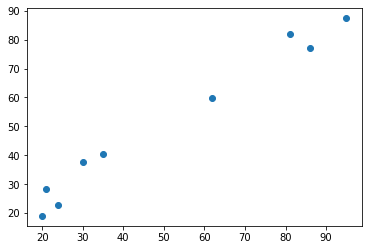

In [28]:
# This plot provides a comparison between the Scores from the given dataset and the ones predicted by my lr 

plt.scatter(Y_test, predictions)

## Evaluating Model 

In [29]:
# Here is a table for easy comparison of Original Scores and Predictions by lr

pd.DataFrame(data=[Y_test,predictions],index = ['Y_test', 'Predictions']).transpose()

,Y_test,Predictions
0,86.0,77.247222
1,95.0,87.413532
2,24.0,22.718833
3,20.0,19.021993
4,30.0,37.506193
5,62.0,59.687232
6,35.0,40.278823
7,81.0,81.868272
8,21.0,28.264093


In [180]:
# Printing the Intercept 

print(lm.intercept_)

5.158843616159267


In [96]:
# Importing sklearn.metrics to calculate error

from sklearn import metrics 

In [177]:
print('MAE : ', metrics.mean_absolute_error(Y_test,predictions))
print('MSE : ', metrics.mean_squared_error(Y_test,predictions))
print('RMSE : ', np.sqrt(metrics.mean_squared_error(Y_test,predictions)))

MAE :  4.647618680145592
MSE :  31.093583463992715
RMSE :  5.5761620729667385


## Checking Accuracy 

In [178]:
lr.score(X_test, Y_test)*100

96.25188960565599

## Residuals 

In [ ]:
# The difference between the observed value of the dependent variable (Y_test) 
# and the predicted value (predictions) is called the residual (e). 
# Each data point has one residual.

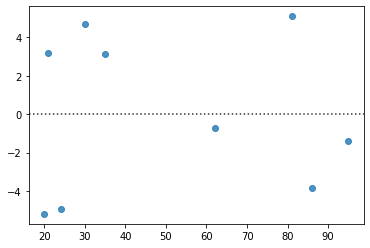

In [23]:
sns.residplot(Y_test, predictions)

## Predicting for the given value of 9.25 Hours 

What would be the score of a student who studies for 9.25 hours?

In [33]:
# Variable for input 

Hours_studied = [[9.25]]  

In [34]:
# Running the model on the input variable

lr.predict(Hours_studied) 

array([90.64826658])

## The score as predicted by the Linear Regression Model is 90.65